In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import statsmodels.formula.api as smf
import lmdiag

In [2]:
np.random.seed(1)

In [27]:
x = pd.Series(np.random.normal(0, 1, 100))
eps = pd.Series(np.random.normal(0, 0.25, 100))

In [30]:
y = -1 + 0.5*x + eps
data = pd.concat([x,eps,y], axis=1).rename(columns={0:'x', 1:'eps', 2:'y'})
data.head()

,x,eps,y
0,-1.461404,-0.119395,-1.850097
1,-0.516348,0.006500,-1.251674
2,0.351117,-0.337174,-1.161616
3,-0.068770,0.325634,-0.708751
4,-1.347765,-0.090653,-1.764535


In [42]:
lm1 = smf.ols(formula='y ~ 1 + x', data=data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     373.8
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           3.23e-35
Time:                        14:55:58   Log-Likelihood:                -5.2818
No. Observations:                 100   AIC:                             14.56
Df Residuals:                      98   BIC:                             19.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0287      0.026    -39.914      

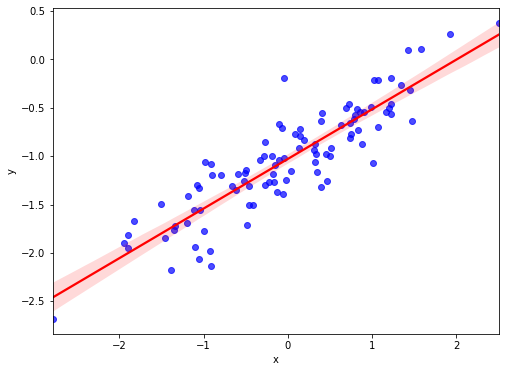

In [54]:
plt.figure(figsize=(8,6))
sb.regplot(data=data, x='x', y='y', color='red', scatter_kws={'color':'blue', 'alpha':0.7});

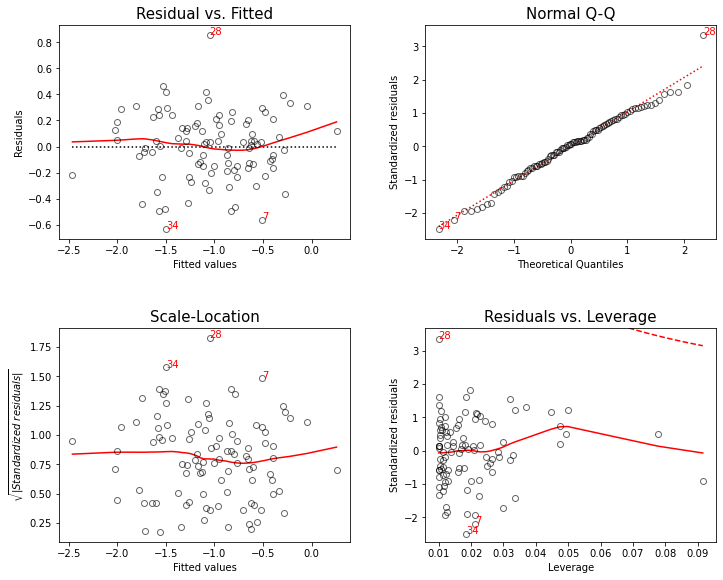

In [57]:
plt.figure(figsize=(10,8))
lmdiag.plot(lm1);

In [59]:
lm2 = smf.ols(formula='y ~ 1 + x + I(x**2)', data=data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           6.52e-34
Time:                        15:07:13   Log-Likelihood:                -5.0879
No. Observations:                 100   AIC:                             16.18
Df Residuals:                      97   BIC:                             23.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0407      0.032    -32.126      

In [60]:
# Quadratic not fit the model since X^2 have p-value 0.541 indicate not a significant coef

In [61]:
eps2 = pd.Series(np.random.normal(0, 0.05, 100))
y2 = -1 + 0.5*x + eps2
data2 = pd.concat([x, y2], axis=1)
lm3 = smf.ols(formula='y2 ~ 1 + x', data=data2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          6.83e-103
Time:                        15:12:39   Log-Likelihood:                 167.10
No. Observations:                 100   AIC:                            -330.2
Df Residuals:                      98   BIC:                            -325.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9941      0.005   -216.223      

In [62]:
lm1.conf_int(alpha=0.05)

,0,1
Intercept,-1.079864,-0.977572
x,0.460539,0.565890


In [63]:
lm3.conf_int(alpha=0.05)

,0,1
Intercept,-1.003177,-0.984930
x,0.492228,0.511021
